# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
taxi = pd.DataFrame(
    data={
        'Passangers': list(range(1,6)),
        'taxi_meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)

taxi

,Passangers,taxi_meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [3]:
taxi.set_index('Passangers')[['taxi_meter']]

,taxi_meter
Passangers,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [4]:
taxi.set_index('Passangers')[['taxi_meter', 'Paid (incl. tips)']]

,taxi_meter,Paid (incl. tips)
Passangers,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


(-0.1, 20.5)

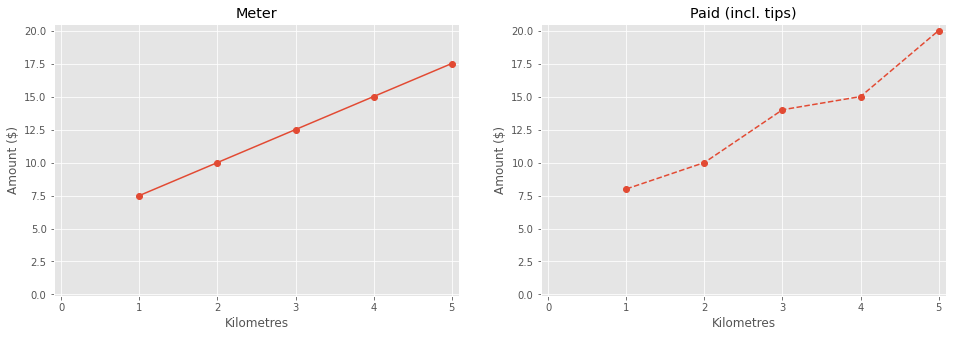

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)
taxi.set_index('Passangers')['taxi_meter'].plot(title='Meter', kind='line', marker='o', zorder=1, ax=axs[0])
taxi.set_index('Passangers')['Paid (incl. tips)'].plot(title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', ax=axs[1])


axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

## Running Linear Regression

In [6]:
taxi

,Passangers,taxi_meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(taxi[['Passangers']], taxi['Paid (incl. tips)'])

taxi['Paid (Predicted)'] = reg.predict(taxi[['Passangers']])

In [8]:
print(
    f'Amount Paid = {reg.intercept_:.1f} + {reg.coef_[0]:.1f} * Distance'
) 

Amount Paid = 4.7 + 2.9 * Distance


## Plotting the Regressed Line
In higher dimensions, the line will be a hyperplane

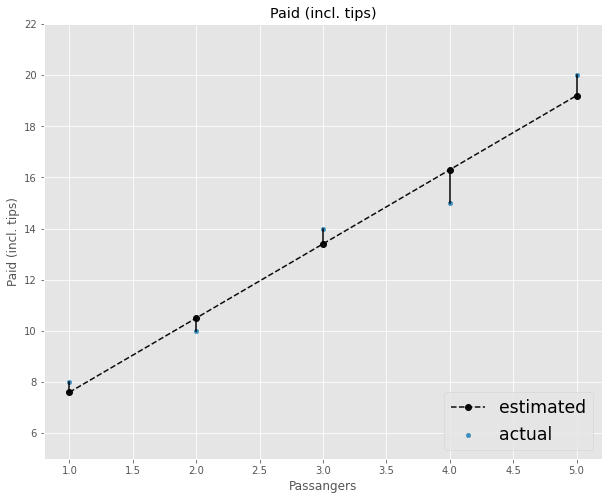

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=False, sharey=False)

taxi.tail(5).plot(
    label='actual', kind='scatter', x='Passangers', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

taxi.tail(5).set_index('Passangers')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in taxi.tail(5)[
    ['Passangers', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')

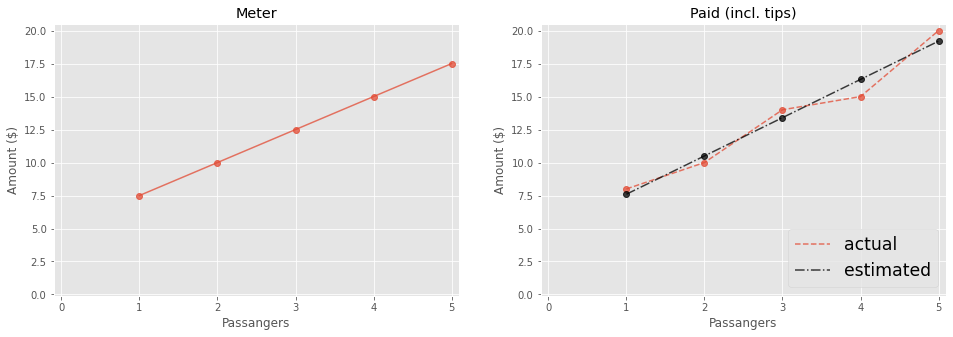

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

taxi.set_index('Passangers')['taxi_meter'].plot(
    title='Meter', kind='line', 
    marker='o', alpha=0.75, ax=axs[0]
)
taxi.set_index('Passangers')['Paid (incl. tips)'].plot(
    label='actual', kind='line', 
    marker='o', linestyle='--', alpha=0.75, ax=axs[1]
)

taxi.set_index('Passangers')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='-.', color='k', alpha=0.75, ax=axs[1]
)

axs[0].set_xlabel('Passangers')
axs[1].set_xlabel('Passangers')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

axs[1].legend(
    markerscale=0.01, loc='lower right', fontsize='xx-large'
)


# Predicting house prices in Boston

In [11]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

df_dataset = pd.DataFrame(
 boston.data,
 columns=boston.feature_names,
)

df_dataset['target'] = boston.target

In [12]:
df_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df_dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

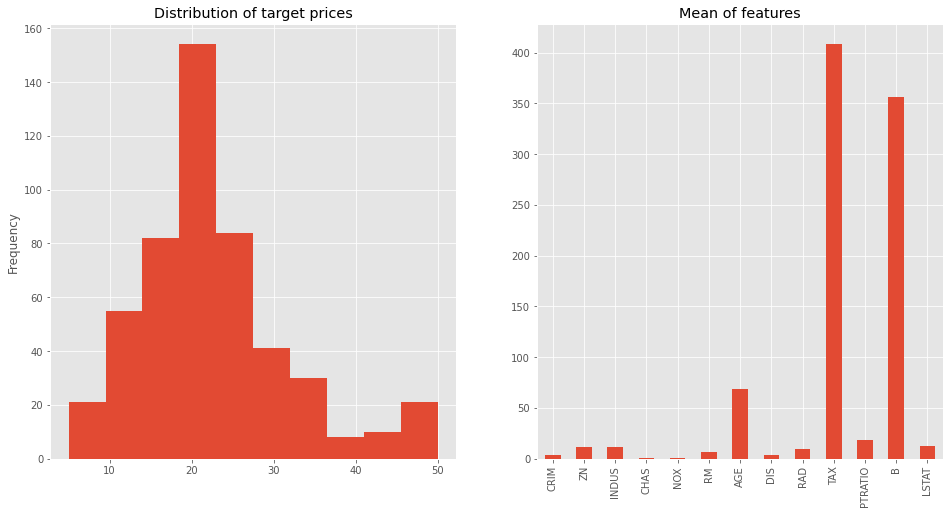

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df_dataset['target'].plot(
 title='Distribution of target prices', kind='hist', ax=axs[0]
)
df_dataset[boston.feature_names].mean().plot(
 title='Mean of features', kind='bar', ax=axs[1]
)

In [15]:
df_dataset['target'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

In [16]:
df_dataset[boston.feature_names].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
df_dataset['target'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

## Splitting the data

In [18]:
data = df_dataset[boston.feature_names]
target = df_dataset['target']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=.4
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((303, 13), (303,), (203, 13), (203,))

In [20]:
print(y_train.mean())
print(y_test.mean())
print(target.mean())

23.217491749174933
21.510837438423636
22.532806324110698


In [21]:
print(y_train.median())
print(y_test.median())
print(target.median())

21.6
20.4
21.2


## Baseline Regressor

In [22]:
from sklearn.dummy import DummyRegressor

bs = DummyRegressor(strategy='mean')
bs.fit(X_train, y_train)

y_pred_bs = bs.predict(X_test)

In [23]:
y_pred_bs[:5]

array([23.21749175, 23.21749175, 23.21749175, 23.21749175, 23.21749175])

## Linear Regressor

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [25]:
y_pred[:5]

array([26.20727843, 27.13389347, 32.86494797, 21.49308469, 39.29554263])

## Comparing our Linear Regression to the baseline model

In [26]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
)

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred), 
        r2_score(y_test, y_pred_bs)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred), 
        mean_absolute_error(y_test, y_pred_bs)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred_bs)
    )
)

R2 Regressor = 0.67 vs Baseline = -0.04
MAE Regressor = 3.55 vs Baseline = 6.66
MSE Regressor = 24.00 vs Baseline = 75.69


## Showing feature coefficients

In [27]:
df_feature_importance = pd.DataFrame(
    {
        'Features': X_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,4.409195,4.409195
CHAS,3.444016,3.444016
RAD,0.271044,0.271044
ZN,0.061992,0.061992
INDUS,0.040153,0.040153
AGE,0.012112,0.012112
B,0.007697,0.007697
TAX,-0.007359,0.007359
CRIM,-0.058809,0.058809


## Scaling for more meaningful coefficients

In [28]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
443,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24.0,666.0,20.2,386.73,18.85
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,396.90,16.35


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
75,0.001941,0.0,0.453446,0.0,0.106996,0.498355,0.414894,0.352062,0.173913,0.401530,0.709302,0.965530,0.198951
186,0.001087,0.0,0.073314,0.0,0.211934,0.816125,0.506383,0.216018,0.086957,0.009560,0.604651,0.989233,0.075055
13,0.013630,0.0,0.281525,0.0,0.314815,0.429042,0.593617,0.373449,0.130435,0.227533,0.976744,1.000000,0.180188
443,0.217758,0.0,0.646628,0.0,0.730453,0.539284,1.000000,0.088595,1.000000,0.913958,0.883721,0.974356,0.472406
394,0.291945,0.0,0.646628,0.0,0.633745,0.416290,0.943617,0.068106,1.000000,0.913958,0.883721,1.000000,0.403422


In [30]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.6702516316492682

In [31]:
mean_absolute_error(y_test, y_pred)

3.5524499096191375

In [32]:
mean_squared_error(y_test, y_pred)

23.997520605969957

In [33]:
df_feature_importance = pd.DataFrame(
    {
        'Features': X_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,21.437504,21.437504
RAD,6.234004,6.234004
ZN,6.199209,6.199209
CHAS,3.444016,3.444016
B,3.052347,3.052347
AGE,1.138573,1.138573
INDUS,1.095369,1.095369
CRIM,-2.689916,2.689916
TAX,-3.848630,3.848630


## Adding polynomial features

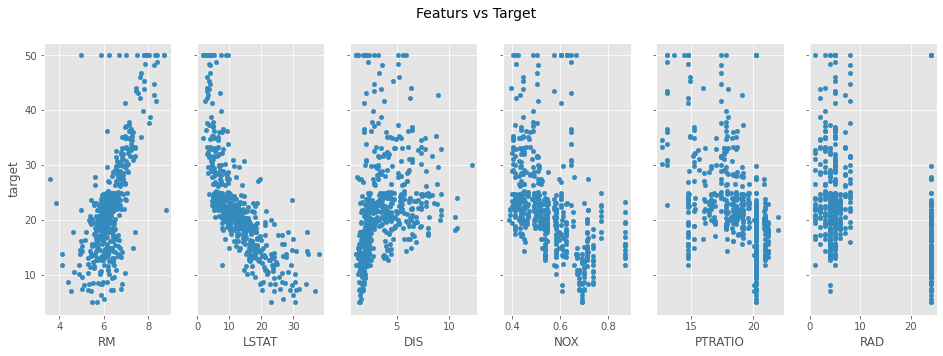

In [34]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [36]:
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)]
feature_translator

[('x0', 'CRIM'),
 ('x1', 'ZN'),
 ('x2', 'INDUS'),
 ('x3', 'CHAS'),
 ('x4', 'NOX'),
 ('x5', 'RM'),
 ('x6', 'AGE'),
 ('x7', 'DIS'),
 ('x8', 'RAD'),
 ('x9', 'TAX'),
 ('x10', 'PTRATIO'),
 ('x11', 'B'),
 ('x12', 'LSTAT')]

In [37]:
X_train_poly

array([[1.00000000e+00, 1.94141730e-03, 0.00000000e+00, ...,
        1.85472222e-01, 3.82173044e-02, 7.87483073e-03],
       [1.00000000e+00, 1.08658153e-03, 0.00000000e+00, ...,
        7.34476416e-02, 5.57262732e-03, 4.22806977e-04],
       [1.00000000e+00, 1.36301486e-02, 0.00000000e+00, ...,
        1.80187638e-01, 3.24675849e-02, 5.85025743e-03],
       ...,
       [1.00000000e+00, 4.77855381e-03, 1.25000000e-01, ...,
        5.05209161e-01, 2.63883413e-01, 1.37832923e-01],
       [1.00000000e+00, 8.51556348e-04, 0.00000000e+00, ...,
        2.02814570e-01, 4.11337496e-02, 8.34252372e-03],
       [1.00000000e+00, 1.23744583e-01, 0.00000000e+00, ...,
        4.07545807e-01, 1.67623207e-01, 6.89432673e-02]])

In [38]:
def translate_feature_names(s):
  for key, val in feature_translator:
    s = s.replace(key, val)
  return s

In [39]:
poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names()
]

poly_features[:5]

['1', 'CRIM', 'ZN', 'INDUS', 'CHAS']

In [40]:
X_train_poly = pd.DataFrame(X_train_poly, columns=poly_features)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_features)

X_train_poly.head()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,ZN0^3,ZN0^2 ZN1,ZN0^2 ZN2,ZN0 ZN1^2,ZN0 ZN1 ZN2,ZN0 ZN2^2,ZN1^3,ZN1^2 ZN2,ZN1 ZN2^2,ZN2^3
0,1.0,0.001941,0.0,0.453446,0.0,0.106996,0.498355,0.414894,0.352062,0.173913,...,0.356857,0.485768,0.100094,0.661246,0.136252,0.028075,0.900114,0.185472,0.038217,0.007875
1,1.0,0.001087,0.0,0.073314,0.0,0.211934,0.816125,0.506383,0.216018,0.086957,...,0.221062,0.361667,0.027440,0.591701,0.044894,0.003406,0.968045,0.073448,0.005573,0.000423
2,1.0,0.013630,0.0,0.281525,0.0,0.314815,0.429042,0.593617,0.373449,0.130435,...,0.931842,0.954029,0.171904,0.976744,0.175997,0.031713,1.000000,0.180188,0.032468,0.005850
3,1.0,0.217758,0.0,0.646628,0.0,0.730453,0.539284,1.000000,0.088595,1.000000,...,0.690153,0.760935,0.368932,0.838977,0.406769,0.197218,0.925023,0.448488,0.217445,0.105426
4,1.0,0.291945,0.0,0.646628,0.0,0.633745,0.416290,0.943617,0.068106,1.000000,...,0.690153,0.780963,0.315057,0.883721,0.356512,0.143825,1.000000,0.403422,0.162749,0.065656


## Fitting the linear regressor with the derived features

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_poly)

In [42]:
X_train_poly.shape

(303, 560)

In [43]:
print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_pred), 
        r2_score(y_test, y_pred_bs)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_pred), 
        mean_absolute_error(y_test, y_pred_bs)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred_bs)
    )
)

R2 Regressor = -166.801 vs Baseline = -0.0
MAE Regressor = 29.241 vs Baseline = 6.7
MSE Regressor = 12211.738 vs Baseline = 75.7


## Regularizing the regressor

### Training the lasso regressor

In [44]:
from sklearn.linear_model import Ridge, Lasso

reg = Lasso(fit_intercept=False)
reg.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_poly)

In [45]:
print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_pred), 
        r2_score(y_test, y_pred_bs)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_pred), 
        mean_absolute_error(y_test, y_pred_bs)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred_bs)
    )
)

# '''
# Original Linear Regressor values:
# R2 Regressor = 0.67 vs Baseline = -0.00
# MAE Regressor = 3.33 vs Baseline = 5.58
# MSE Regressor = 21.34 vs Baseline = 64.73
# '''

R2 Regressor = 0.443 vs Baseline = -0.0
MAE Regressor = 4.456 vs Baseline = 6.7
MSE Regressor = 40.543 vs Baseline = 75.7


## Finding the optimum regularization parameter(Lasso + Cross Validation)

In [46]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 50)
reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5, n_jobs=-1)
reg.fit(X_train_poly, y_train)

y_train_pred = reg.predict(X_train_poly)
y_test_pred = reg.predict(X_test_poly)

In [47]:
f'{alphas.min():.6f}, {alphas.max():,.0f}'

'0.000001, 1,000,000'

In [48]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 0.014563484775012445


## Regularisation Plot

Text(0, 0.5, 'Mean Squared Error')

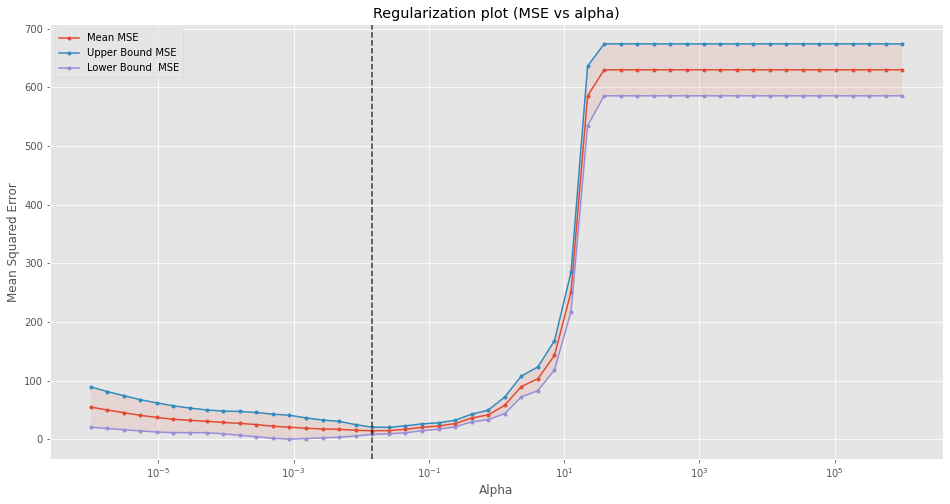

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

n_folds = reg.mse_path_.shape[1]

mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
mse_std_error = mse_std / np.sqrt(n_folds)

pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound  MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[['Mean MSE', 'Upper Bound MSE', 'Lower Bound  MSE']].plot(
    title='Regularization plot (MSE vs alpha)', marker='.', logx=True, ax=ax
)

plt.fill_between(reg.alphas_, mse_mean + 1.96 * mse_std_error, mse_mean - 1.96 * mse_std_error, alpha=0.1)

ax.axvline(reg.alpha_,  linestyle='--', color='k', alpha=0.75,)

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')


Text(0, 0.5, 'Mean Squared Error')

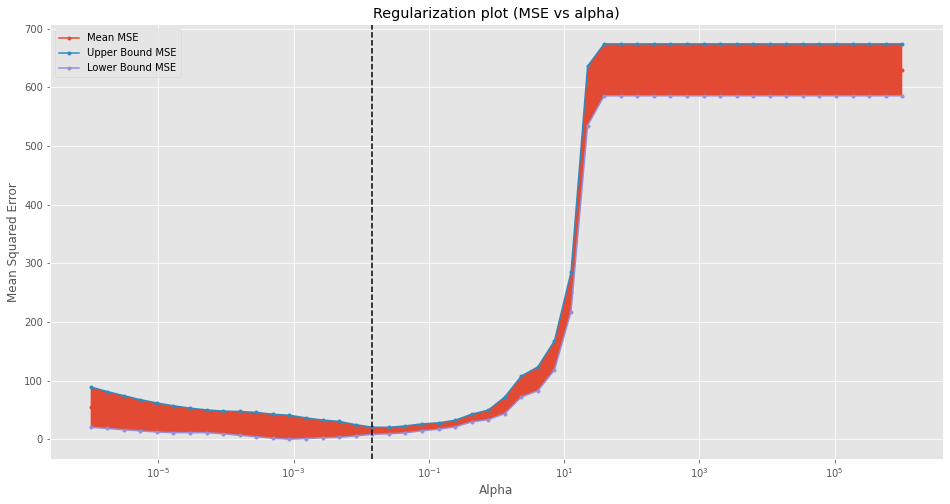

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[
    ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
    title='Regularization plot (MSE vs alpha)', 
    marker='.', logx=True, ax=ax
)

# Color the confidence interval 
plt.fill_between(
    reg.alphas_, 
    mse_mean + 1.96 * mse_std_error, 
    mse_mean - 1.96 * mse_std_error, 
)

# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')


In [51]:
reg = Lasso(alpha=reg.alpha_, fit_intercept=False)
reg.fit(X_train_poly, y_train)

# y_train_pred = reg.predict(X_train_poly)
y_pred = reg.predict(X_test_poly)

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_pred), 
        r2_score(y_test, y_pred_bs)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_pred), 
        mean_absolute_error(y_test, y_pred_bs)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred_bs)
    )
)

# '''
# Original Linear Regressor values:
# R2 Regressor = 0.67 vs Baseline = -0.00
# MAE Regressor = 3.33 vs Baseline = 5.58
# MSE Regressor = 21.34 vs Baseline = 64.73
# '''

R2 Regressor = 0.730 vs Baseline = -0.0
MAE Regressor = 2.536 vs Baseline = 6.7
MSE Regressor = 19.659 vs Baseline = 75.7


## Finding regression intervals

It's not always guaranteed that we have accurate models. Sometimes, our data is inherently noisy and we cannot model it using a regressor. In these cases, it is important to be able to quantify how certain we are in our estimations. Usually, regressors make point predictions. These are the expected values (typically the mean) of the target (y) at each value of x. A Bayesian ridge regressor is capable of returning the expected values as usual, yet it also returns the standard deviation of the target (y) at each value of x. 

let's create a noisy dataset, where :
### $ y = x + Noise$

In [52]:
df_noisy = pd.DataFrame(
 {
 'x': np.random.random_integers(0, 30, size=150),
 'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
 }
)
df_noisy['y'] = df_noisy['x'] + df_noisy['noise']

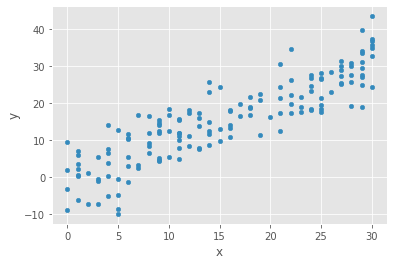

In [53]:
df_noisy.plot(
 kind='scatter', x='x', y='y'
)

In [54]:
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])

br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']],
return_std=True)

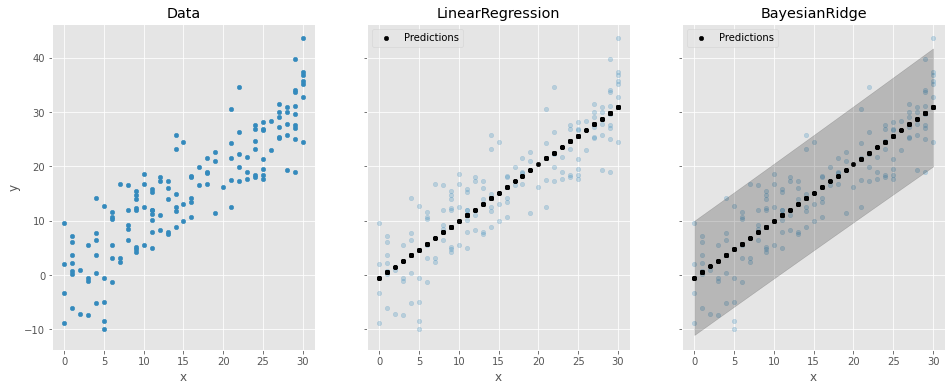

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

# We plot the data 3 times
df_noisy.sort_values('x').plot(
 title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
df_noisy.sort_values('x').plot(
 kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)
df_noisy.sort_values('x').plot(
 kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

# Here we plot the Linear Regression predictions
df_noisy.sort_values('x').plot(
 title='LinearRegression', kind='scatter', x='x', y='y_lr_pred',
 ax=axs[1], marker='o', color='k', label='Predictions'
)
# Here we plot the Bayesian Ridge predictions
df_noisy.sort_values('x').plot(
 title='BayesianRidge', kind='scatter', x='x', y='y_br_pred',
 ax=axs[2], marker='o', color='k', label='Predictions'
)
# Here we plot the range around the expected values
# We multiply by 1.96 for a 95% Confidence Interval
axs[2].fill_between(
 df_noisy.sort_values('x')['x'],
 df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'],
 df_noisy.sort_values('x')['y_br_pred'] + 1.96 *
 df_noisy.sort_values('x')['y_br_std'],
 color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)